In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
plt.rcParams["font.family"] = "Arial"
plt.rcParams["font.size"] = 10

In [2]:
MSQE = 0.4
predito = np.array([2.2, 4.4, 6.6, 0.2])
residuos = np.array([-.2, .6, -.6, .2])
alavancagem = np.array([.7, .3, .3, .7])
ensaio = ["Ensaio 1", "Ensaio 2", "Ensaio 3", "Ensaio 4", ]

In [3]:
def studentized_residuals(residual, MSQE, leverage):
    return residual/np.sqrt(MSQE*(1 - leverage))


array([-0.57735027,  1.13389342, -1.13389342,  0.57735027])

In [7]:
def check_studentized_residuals(residuos_student, ensaio, limite=2):
    aux = True
    for res_stu, ens in zip(residuos_student, ensaio):
        if np.abs(res_stu) > limite:
            aux = False
            print(f'O resíduo studentizado ({round(res_stu, 3)}) do ensaio "{ens}" esta acima do limite esperado ({limite})')
    if aux:
        print(f"Nenhum resíduo studentizado é maior do que {limite}.")
            
check_studentized_residuals(residuos_student, ensaio)            

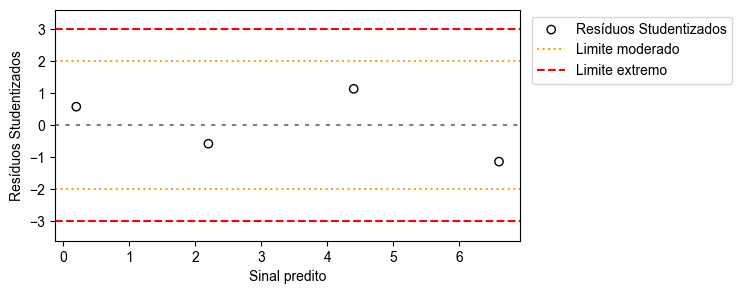

In [6]:
def make_studentized_residuals_plot(studentized_residuals, y_pred, mild=2, extreme=3):
    
    # determinando o limite do eixo y
    y_min = np.abs(np.max([np.abs(studentized_residuals)]))
    if y_min < extreme:
        y_min = extreme*1.2
    else:
        y_min = y_min*1.2

    # criando o canvas
    plt.figure(figsize=(6,3))
    # adicionando os dados studentizados
    plt.scatter(y_pred, studentized_residuals, label="Resíduos Studentizados",  color='k', facecolor='none')

    # linhas em y = 0
    plt.axhline(y=0, color="gray", linestyle=(0, (2, 3)))

    # limite moderado
    plt.axhline(y=mild, color="orange", label="Limite moderado", linestyle="dotted")
    plt.axhline(y=-1*mild, color="orange", linestyle="dotted")
    
    # limite extremo
    plt.axhline(y=extreme, color="red", label="Limite extremo", linestyle="dashed")
    plt.axhline(y=-1*extreme, color="red", linestyle="dashed")

    # minor
    plt.ylabel("Resíduos Studentizados")
    plt.xlabel("Sinal predito")
    plt.ylim(-1*y_min, y_min)
    plt.legend(bbox_to_anchor=(1.01,1))
    plt.show()
    
make_studentized_residuals_plot(residuos_student, predito)

In [ ]:
limite_studentizado_moderado = 2
limite_studentizado_extremo = 3


y_min = np.abs(np.max([np.abs(residuos_student)]))
if y_min < limite_studentizado_extremo:
    y_min = limite_studentizado_extremo*1.2
else:
    y_min = y_min*1.2


plt.figure(figsize=(6,3))
plt.scatter(predito, residuos_student, label="Resíduos Studentizados",  color='k', facecolor='none')


plt.axhline(y=0, color="gray", linestyle=(0, (2, 3)))


plt.axhline(y=limite_studentizado_moderado, color="orange", label="Limite moderado", linestyle="dotted")
plt.axhline(y=-1*limite_studentizado_moderado, color="orange", linestyle="dotted")

plt.axhline(y=limite_studentizado_extremo, color="red", label="Limite extremo", linestyle="dashed")
plt.axhline(y=-1*limite_studentizado_extremo, color="red", linestyle="dashed")


plt.ylabel("Resíduos Studentizados")
plt.xlabel("Sinal predito")
plt.ylim(-1*y_min, y_min)
plt.legend(bbox_to_anchor=(1.01,1))

plt.show()